# fig & ax = plot.subplots()
- fig ax = plt.subplots()
- ax[i].set_xlim(0, 120000) 
- ax[i].set_ylabel('')
- ax[i].legend('')
- ax[i].invert_yaxis()
- fig.suptitle('count of skill', fontsize=13)
- fig.tight_layout()
- **piecharts**
- **scatter plot**
- **histogram**
- **box plot**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ast

df = pd.read_csv('C:/Users/Ian/Desktop/panda ex/newdata_jobs4.csv')

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = (df['job_skills']
                    .apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x))


In [190]:
df_samp= df.copy()
df_samp = df_samp.explode(column='job_skills')
df_samp = df_samp.groupby(['job_title_short', 'job_skills']).size().sort_values(ascending=False)

In [191]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']
df_samp = df_samp.reset_index(name='skill_count')

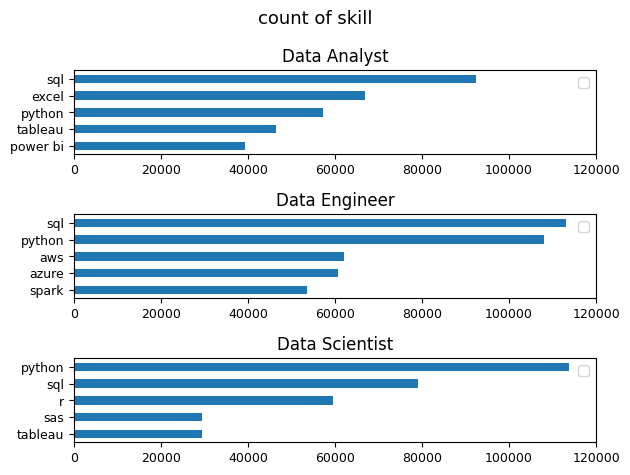

In [192]:
fig, ax = plt.subplots(3,1)
for i, job_title in enumerate (job_titles):
    df_plot = df_samp[df_samp['job_title_short']==job_title].head()
    df_plot.plot(kind='barh', x='job_skills', y='skill_count', ax=ax[i], title=job_title, fontsize=9) 
    ax[i].set_xlim(0, 120000) 
    ax[i].set_ylabel('')
    ax[i].legend('')
    ax[i].invert_yaxis()

    fig.suptitle('count of skill', fontsize=13)
    fig.tight_layout()


## Piecharts

In [193]:
df_pie = df.copy()

<function matplotlib.pyplot.show(close=None, block=None)>

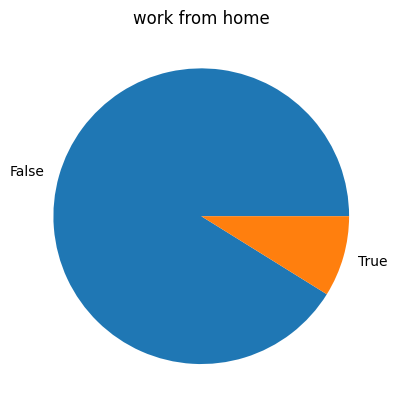

In [194]:
df_pie['job_work_from_home'].value_counts().plot(kind='pie')
plt.title('work from home')
plt.ylabel('')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

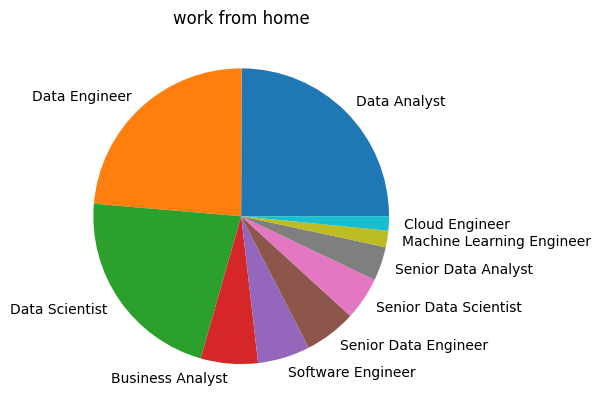

In [195]:
df_pie['job_title_short'].value_counts().plot(kind='pie')
plt.title('work from home')
plt.ylabel('')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

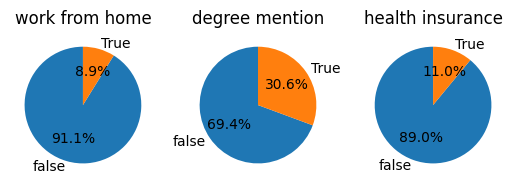

In [196]:

fig, ax = plt.subplots(1,3)
ax[0].pie(df_pie['job_work_from_home'].value_counts(),startangle=90, autopct='%1.1f%%', labels=('false','True'))
ax[0].set_title('work from home')
ax[1].pie(df_pie['job_no_degree_mention'].value_counts(),startangle=90, autopct='%1.1f%%', labels=('false','True'))
ax[1].set_title('degree mention')
ax[2].pie(df_pie['job_health_insurance'].value_counts(),startangle=90, autopct='%1.1f%%', labels=('false','True'))
ax[2].set_title('health insurance')
plt.show


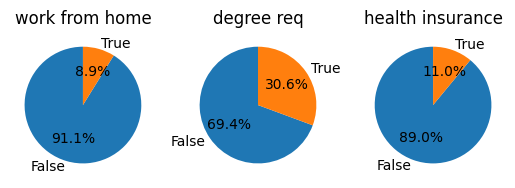

In [198]:
# second alternative
df_pie2 = df.copy()
fig, ax = plt.subplots(1, 3)
dict_skills = {
    'job_work_from_home':'work from home',
    'job_no_degree_mention':'degree req',
    'job_health_insurance':'health insurance'
}
for i, (column, title) in enumerate (dict_skills.items()):
    df_pieplot = df_pie2[column].value_counts()
    df_pieplot.plot(kind='pie', ax=ax[i], startangle=90, autopct='%1.1f%%', title=title)
    ax[i].set_ylabel('')

## scatter plots

In [207]:
df_scater = df.explode(column='job_skills').copy()

In [208]:
df_scater = df_scater[df_scater['job_country']=='United States']

In [209]:
df_scater = df_scater[df_scater['job_title_short']=='Data Analyst']

In [210]:
df_scater = (df_scater.groupby('job_skills').agg(skill_count = ('job_skills', 'count'), median_salary =('salary_year_avg','median')).sort_values(by='skill_count', ascending=False).head(10))

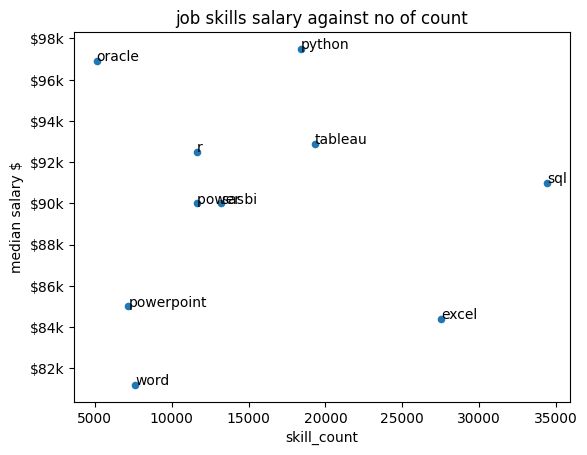

In [249]:
df_scater.plot(kind='scatter', x='skill_count', y='median_salary')
plt.title('job skills salary against no of count')
plt.ylabel('median salary $')
ax=plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}k'))


for i, txt in enumerate(df_scater.index):
    plt.text(df_scater['skill_count'].iloc[i], df_scater['median_salary'].iloc[i], txt)



## histogram

In [ ]:
df_DA_US = df[(df['job_title_short']=='Data Analyst') & (df['job_country']=='United States')].copy()

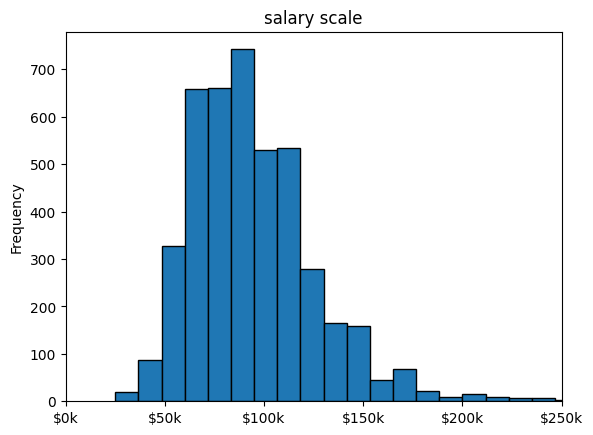

In [247]:
df_us_plot = df_DA_US['salary_year_avg'].plot(kind='hist', bins=30, edgecolor='black')
plt.title('salary scale')
plt.xlim(0, 250000)

ax=plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}k'))


# box plot

In [250]:
df_box_plot = df_DA_US['salary_year_avg'].copy()

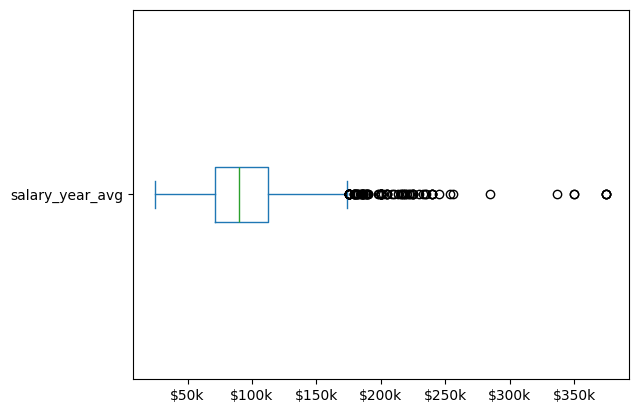

In [280]:
df_box_plot.plot(kind='box', vert=False)
ax=plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}k'))

In [258]:
job_title_list = df["job_title_short"].value_counts().sort_values(ascending=False).head(3).index.tolist()
df_box_us = df[(df['job_title_short'].isin(job_title_list)) & (df['job_country']=='United States')].copy()

In [262]:
df_box_us.dropna(subset='salary_year_avg', inplace=True)

In [266]:
box_job_list = [df_box_us[df_box_us['job_title_short']==box_job_title]['salary_year_avg'] for box_job_title in job_title_list]

C:\Users\Ian\AppData\Local\Temp\ipykernel_3480\2359260872.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(box_job_list, labels=job_title_list, vert=False)


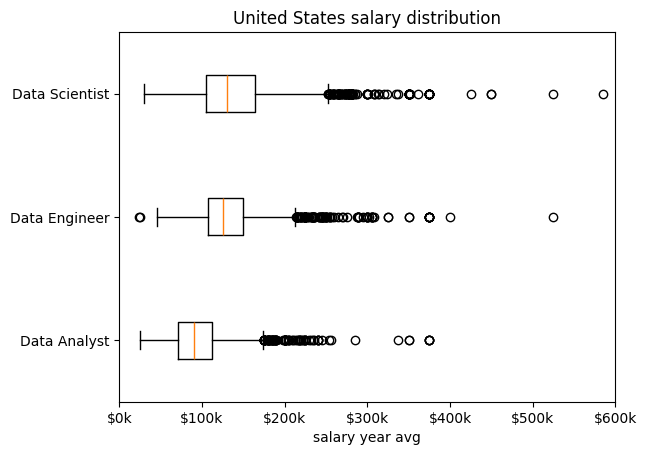

In [286]:
plt.boxplot(box_job_list, labels=job_title_list, vert=False)
ax=plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}k'))
plt.xlabel('salary year avg')
plt.title("United States salary distribution" )
plt.xlim(0, 600000)
plt.show()
